# Binary classification based on fully connected neural network

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torch.autograd import Variable
import torchvision
import os
import sys

#from scipy.special import xlogy

import matplotlib.pyplot as plt
import numpy as np
import time


transform = transforms.Compose([#transforms.Resize((256,256)),  
                                transforms.Grayscale(),		# the code transforms.Graysclae() is for changing the size [3,100,100] to [1, 100, 100] (notice : [channel, height, width] )
                                transforms.ToTensor(),])

 
#train_data_path = 'relative path of training data set'
train_data_path = 'C:\\Users\\newmi\\OneDrive\\바탕 화면\\horse-or-human\\horse-or-human\\train'
trainset = torchvision.datasets.ImageFolder(root=train_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
# if shuffle=True, the data reshuffled at every epoch 
loader_train = torch.utils.data.DataLoader(trainset, batch_size=30, shuffle=False, num_workers=1)  


validation_data_path = 'C:\\Users\\newmi\\OneDrive\\바탕 화면\\horse-or-human\\horse-or-human\\validation'
valset = torchvision.datasets.ImageFolder(root=validation_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
loader_test = torch.utils.data.DataLoader(valset, batch_size=30, shuffle=False, num_workers=1)  


- Loss function with a regularization term based on L2​ norm
- Optimization Stochastic gradient descent with LeRU function


In [357]:
import torch 
import torchvision.datasets as dsets 
import torchvision.transforms as transforms 
import random

# -----------------------------------------------------------------------------
# Set the flag for using cuda
# -----------------------------------------------------------------------------

device = 'cuda' if torch.cuda.is_available() else 'cpu'

if device == 'cuda':
    torch.cuda.manual_seed_all(777)

random.seed(111)
torch.manual_seed(777)
mnist_train=trainset
mnist_test =valset



# -----------------------------------------------------------------------------
# load neural network model
# -----------------------------------------------------------------------------

epochs = 153
batch_size = 8
learning_rate = 0.0001
weight_decay=1

loader_train = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)
loader_test= torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=True, drop_last=True) 
linear1 = torch.nn.Linear(100*100, 50, bias=True) 
linear2 = torch.nn.Linear(50,50, bias=True) 
linear3 = torch.nn.Linear(50,11, bias=True)
relu = torch.nn.ReLU()
torch.nn.init.normal_(linear1.weight) 
torch.nn.init.normal_(linear2.weight) 
torch.nn.init.normal_(linear3.weight)


model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device) 

# -----------------------------------------------------------------------------
# optimization algorithm
# -----------------------------------------------------------------------------


loss_function = torch.nn.CrossEntropyLoss().to(device) 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,weight_decay=weight_decay)


# -----------------------------------------------------------------------------
# Initialization of loss array and accuracy array
# -----------------------------------------------------------------------------


loss_train_mean        = np.zeros(epochs)
loss_train_std         = np.zeros(epochs)
accuracy_train         = np.zeros(epochs)
accuracy_train_std     = np.zeros(epochs)

loss_test_mean          = np.zeros(epochs)
loss_test_std          = np.zeros(epochs)
accuracy_test          = np.zeros(epochs)

# -----------------------------------------------------------------------------
# Calculating for training the model
# -----------------------------------------------------------------------------

print('start')
for epoch in range(epochs): 
    
    # -----------------------------------------------------------------------------
    # function for training the model
    # -----------------------------------------------------------------------------
    avg_loss_train = 0 
    batch_count_train = len(loader_train)
    running_corrects_train = 0
    loss_accuracy          = []
    loss_train             = []

    
    for X, Y in loader_train:
        
        X = X.view(-1, 100*100).to(device) 
        Y = Y.to(device)
        prediction = model(X)
        _, preds = torch.max(prediction, 1)
        loss = loss_function(prediction, Y) 
        
        optimizer.zero_grad() 
        loss.backward() 
        optimizer.step() 
        
    
        loss_train_batch       =loss.item()/len(X)
        loss_train.append(loss_train_batch)
        running_corrects_train += torch.sum(preds == Y).item() /len(loader_train.dataset)
        loss_accuracy.append(running_corrects_train)
    

    loss_train_mean[epoch]     = np.mean(loss_train)
    loss_train_std[epoch]      = np.std(loss_train)
    accuracy_train_std[epoch]  = np.std(loss_accuracy)
    accuracy_train[epoch]=running_corrects_train
    
    # -----------------------------------------------------------------------------
    # function for testing the model
    # -----------------------------------------------------------------------------

    avg_loss_test         = 0 
    batch_count_test      = len(loader_test)
    running_corrects_test = 0
    loss_test              = []
    
    for datas, labels in loader_test:

        datas         = datas.view(-1, 100*100).to(device) 
        labels        = labels.to(device)
        prediction    = model(datas)
        _, preds_test = torch.max(prediction, 1)
        loss          = loss_function(prediction,labels) 
    
    
        loss_test_batch       =loss.item()/len(datas)
        loss_test.append(loss_test_batch)
        running_corrects_test += torch.sum(preds_test == labels).item()
        
 
    loss_test_mean[epoch]       = np.mean(loss_test)
    running_corrects_test      = running_corrects_test / len(loader_test.dataset)
    accuracy_test[epoch]       = running_corrects_test

    print("""[EPOCH %4d ] LOSS     :(TRAIN) %3.10f        (TEST): %3.10f
              ACCURACY :(TRAIN) %3.10f%%       (TEST): %3.10f%%\n"""%(epoch,loss_train_batch,loss_test_batch,(running_corrects_train*100),(running_corrects_test*100)))

start
[EPOCH    0 ] LOSS     :(TRAIN) 1.7101622820        (TEST): 7.5678787231
              ACCURACY :(TRAIN) 49.8888888889%       (TEST): 62.8000000000%

[EPOCH    1 ] LOSS     :(TRAIN) 10.6595630646        (TEST): 11.3186035156
              ACCURACY :(TRAIN) 68.3333333333%       (TEST): 69.2000000000%

[EPOCH    2 ] LOSS     :(TRAIN) 2.8114550114        (TEST): 6.7598609924
              ACCURACY :(TRAIN) 71.2222222222%       (TEST): 69.6000000000%

[EPOCH    3 ] LOSS     :(TRAIN) 4.2264733315        (TEST): 3.7534179688
              ACCURACY :(TRAIN) 74.7777777778%       (TEST): 76.8000000000%

[EPOCH    4 ] LOSS     :(TRAIN) 1.4688758850        (TEST): 0.0000006631
              ACCURACY :(TRAIN) 77.4444444444%       (TEST): 78.0000000000%

[EPOCH    5 ] LOSS     :(TRAIN) 0.2081146538        (TEST): 8.4846649170
              ACCURACY :(TRAIN) 75.3333333333%       (TEST): 73.6000000000%

[EPOCH    6 ] LOSS     :(TRAIN) 1.2081222534        (TEST): 5.3128433228
              ACCUR

[EPOCH   55 ] LOSS     :(TRAIN) 0.1075602844        (TEST): 0.0240656994
              ACCURACY :(TRAIN) 88.2222222222%       (TEST): 85.6000000000%

[EPOCH   56 ] LOSS     :(TRAIN) 0.0105240261        (TEST): 0.0001007967
              ACCURACY :(TRAIN) 87.1111111111%       (TEST): 84.8000000000%

[EPOCH   57 ] LOSS     :(TRAIN) 0.1518491805        (TEST): 0.1231509298
              ACCURACY :(TRAIN) 87.4444444444%       (TEST): 84.8000000000%

[EPOCH   58 ] LOSS     :(TRAIN) 0.1144929528        (TEST): 0.1934154630
              ACCURACY :(TRAIN) 89.3333333333%       (TEST): 87.2000000000%

[EPOCH   59 ] LOSS     :(TRAIN) 0.0084016919        (TEST): 0.0752337500
              ACCURACY :(TRAIN) 87.2222222222%       (TEST): 84.0000000000%

[EPOCH   60 ] LOSS     :(TRAIN) 0.0839517415        (TEST): 0.0617179014
              ACCURACY :(TRAIN) 90.7777777778%       (TEST): 86.4000000000%

[EPOCH   61 ] LOSS     :(TRAIN) 0.0247109495        (TEST): 0.0721326396
              ACCURACY :(TR

[EPOCH  110 ] LOSS     :(TRAIN) 0.0530632548        (TEST): 0.0478601977
              ACCURACY :(TRAIN) 90.8888888889%       (TEST): 88.4000000000%

[EPOCH  111 ] LOSS     :(TRAIN) 0.0772599727        (TEST): 0.0342754796
              ACCURACY :(TRAIN) 91.2222222222%       (TEST): 87.2000000000%

[EPOCH  112 ] LOSS     :(TRAIN) 0.0673160926        (TEST): 0.0590111613
              ACCURACY :(TRAIN) 90.6666666667%       (TEST): 88.0000000000%

[EPOCH  113 ] LOSS     :(TRAIN) 0.0529230051        (TEST): 0.0232043155
              ACCURACY :(TRAIN) 90.7777777778%       (TEST): 88.0000000000%

[EPOCH  114 ] LOSS     :(TRAIN) 0.0569535457        (TEST): 0.0534576476
              ACCURACY :(TRAIN) 91.1111111111%       (TEST): 87.2000000000%

[EPOCH  115 ] LOSS     :(TRAIN) 0.0561788306        (TEST): 0.0206116345
              ACCURACY :(TRAIN) 91.0000000000%       (TEST): 88.0000000000%

[EPOCH  116 ] LOSS     :(TRAIN) 0.0535793230        (TEST): 0.0849098042
              ACCURACY :(TR

## Plot the Total loss train and test

Text(0.5, 0, 'EPOCH')

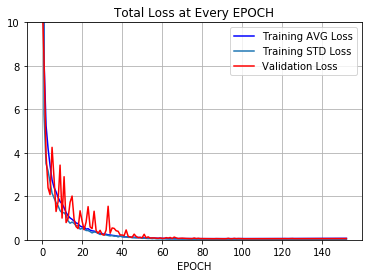

In [358]:
plt.plot(loss_train_mean,color="b",label='Training AVG Loss')
plt.plot(loss_train_std,label='Training STD Loss')
plt.plot(loss_test_mean,color="r",label='Validation Loss')
plt.legend(loc='upper right')
plt.ylim([0,10])
plt.grid()
plt.title("Total Loss at Every EPOCH")
plt.xlabel("EPOCH")

## [Learning Curve] : Training Loss with Standard Deviation.

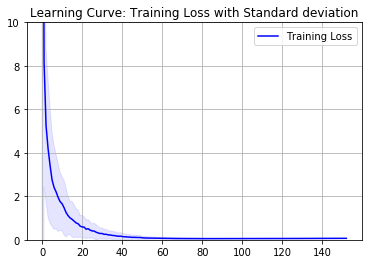

In [359]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC
from sklearn.datasets import load_digits


train_sizes=np.array(range(epochs))


plt.title("Learning Curve: Training Loss with Standard deviation")
plt.grid()
plt.ylim([0,10])
plt.fill_between(train_sizes,loss_train_mean  - loss_train_std, loss_train_mean + loss_train_std, alpha=0.1,color="b")
plt.plot(train_sizes, loss_train_mean, color="b",label="Training Loss")
plt.legend(loc='upper right')

plt.show()






## [Learning Curve] : Train and test Accuracy with Standard Deviation.

Text(0.5, 0, 'EPOCH')

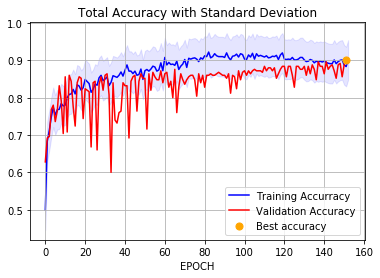

In [366]:
max_index=np.argmax(accuracy_test)
accuracy_train_std_=np.std(accuracy_train)
accuracy_test_std_=np.std(accuracy_test)
plt.fill_between(train_sizes,accuracy_train  - accuracy_train_std_,accuracy_train  + accuracy_train_std_, alpha=0.1,color="b")
plt.plot(accuracy_train, color="b",zorder=1,label="Training Accurracy")
plt.plot(accuracy_test,color="r",zorder=2,label='Validation Accuracy')
plt.scatter(max_index,accuracy_test[max_index],c='ORANGE',s=50,zorder=10,label='Best accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.title("Total Accuracy with Standard Deviation")
plt.xlabel("EPOCH")

## Visualize Table : Present the final loss and accuracy at convergence

In [361]:
max_index=np.argmax(accuracy_test)
print("""
                           <At convergence>
+-----------------------------+-----------------------+--------------------+
|       At convergence        |          Loss         |      Accuracy      |
+-----------------------------+-----------------------+--------------------+
|       Training              |         %6.3f        |      %6.2f %%      |
+-----------------------------+-----------------------+--------------------+
|      Validation             |         %6.3f        |      %6.2f %%      |
+-----------------------------+-----------------------+--------------------+

"""
%(loss_train_mean[epochs-1],accuracy_train[epochs-1]*100,loss_test_mean[epochs-1],accuracy_test[epochs-1]*100))


                           <At convergence>
+-----------------------------+-----------------------+--------------------+
|       At convergence        |          Loss         |      Accuracy      |
+-----------------------------+-----------------------+--------------------+
|       Training              |          0.067        |       90.11 %      |
+-----------------------------+-----------------------+--------------------+
|      Validation             |          0.056        |       90.00 %      |
+-----------------------------+-----------------------+--------------------+


